<a href="https://colab.research.google.com/github/ruoroj/ProjectWeekPractice/blob/main/Xyz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the libraries needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df = pd.read_csv('/content/MentalHealth (1).csv')
df


,Unnamed: 0,Unnamed: 0.1,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,disorder
0,0,0,TheKenyanPost,SHOCK as a young man climbs on top of a hospit...,"Nairobi, Kenya","News, Politics, Entertainment, Gossip, Feature...",434,52951,356584,2021-08-17 10:33:55,0,[],depression
1,1,1,Goodguy_254,People tend to hide depression under drinking ...,"Nairobi, Kenya",poet\n writer🧾\nsoftware developer🖥️\n program...,2074,2257,1284,2021-08-17 10:20:30,0,[],depression
2,2,2,AlfredLete,@Lily_nganga Depression,Nairobi,"do what is right,not what is easy",8515,13075,37974,2021-08-17 09:32:49,0,[],depression
3,3,3,GeraldNgaoPk7,Itumbi has subjected bloggers in to depression...,"Nairobi, Kenya",Pan-Africanist||NeoMarxistRevolutionary||Inter...,21503,20437,164694,2021-08-17 08:56:26,2,"[{'text': 'ItumbiGhostWorkers', 'indices': [77...",depression
4,4,4,swyma304,Mental health isn’t just anxiety &amp; depress...,"Nairobi, Kenya",Psychiatry Resident. Certified Cognitive Behav...,93,206,594,2021-08-17 08:18:20,1,[],depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,9,9,BravinYuri,The Good Doctor is a Very great series for Men...,"Nairobi, Kenya",Founder Mental Health Kenya(@MHKenya)|| Mental...,5193,182022,60235,2021-08-12 14:14:33,18,[],austim
752,10,10,RealAmiani_Ke,"“Mason is 10 years old and has autism, epileps...","Nairobi, Kenya",#𝗖𝗢𝗬𝗚,2033,29612,19792,2021-08-12 07:37:45,1,[],austim
753,11,11,lord_bryane,"With artificial intelligence, we shall be able...","Nairobi, Kenya",Founder & CEO\nCybertech labs&systems 🇰🇪 \n\nA...,1046,169,973,2021-08-12 06:24:42,2,"[{'text': 'IPCCReport', 'indices': [85, 96]}, ...",austim
754,12,12,lord_bryane,"At our Research Labs, we've looked at the grap...","Nairobi, Kenya",Founder & CEO\nCybertech labs&systems 🇰🇪 \n\nA...,1046,169,973,2021-08-12 06:24:41,0,[],austim


In [ ]:
# Exploring the data 
df.shape

(756, 13)

# DATA CLEANING

In [ ]:
# loooking for duplicates ?
df.duplicated().sum()

0

There are no duplicates in the Tweets. 

In [ ]:
# Droping all irrelevant collumns
droplist = ['description', 'location', 'friends_count', 'user',
       'followers_count', 'statuses_count', 'retweet_count',
       'hashtags', 'Unnamed: 0', 'Unnamed: 0.1', 'created_at']
df.drop(droplist, axis=1, inplace=True)
df.columns

Index(['tweet', 'disorder'], dtype='object')

In [ ]:

from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# 1.Retaining only alphabets
df['tweet']=df['tweet'].apply(lambda x: re.sub("[^a-zA-Z]", " ",x))

# 2. convert to lowercase and tokenize
df['tweet'] = df['tweet'].apply(lambda x:x.lower().split())

# ## 3.Removing stopwords
# stop = set(stopwords.words('english'))
# df['tweet'] = df['tweet'].apply(lambda x:[i for i in x if i not in stop])

# ## 4.join list elements
# df['tweet'] = df['tweet'].apply(lambda x:' '.join(x))

In [ ]:
import os
import glob
import nltk
import string
import missingno
import unicodedata
import re
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
from plotly import graph_objects as go
nltk.download('stopwords')
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
mylist = [1]
base = ['Depression', 'anxiety', 'suicidal']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



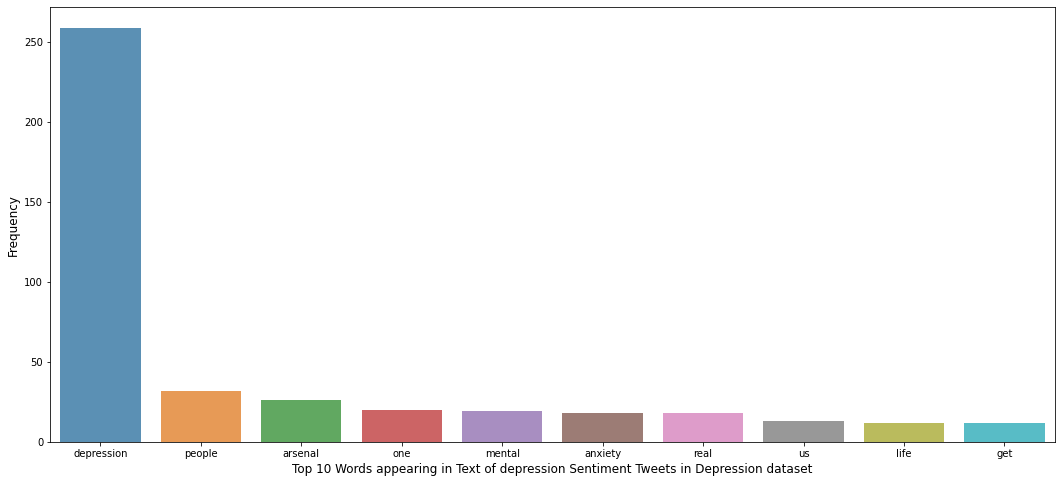

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



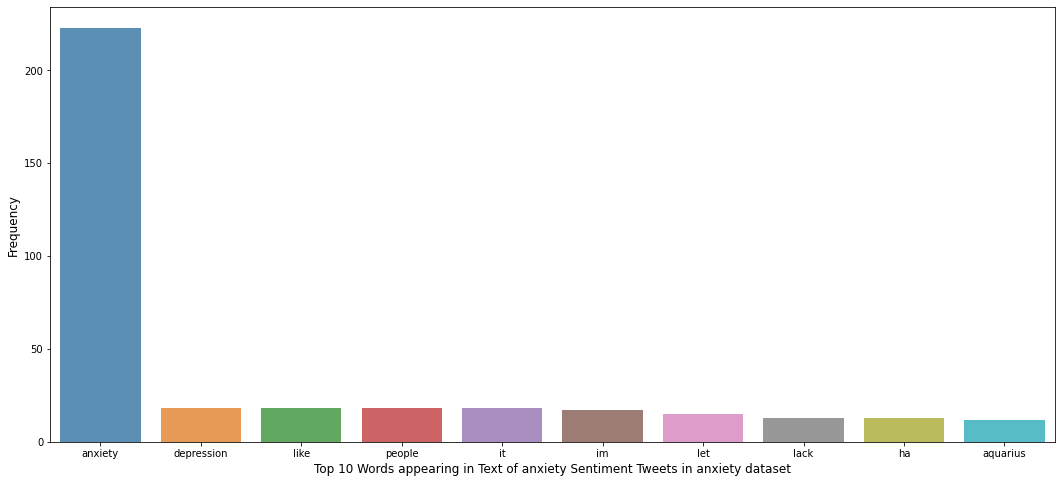

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



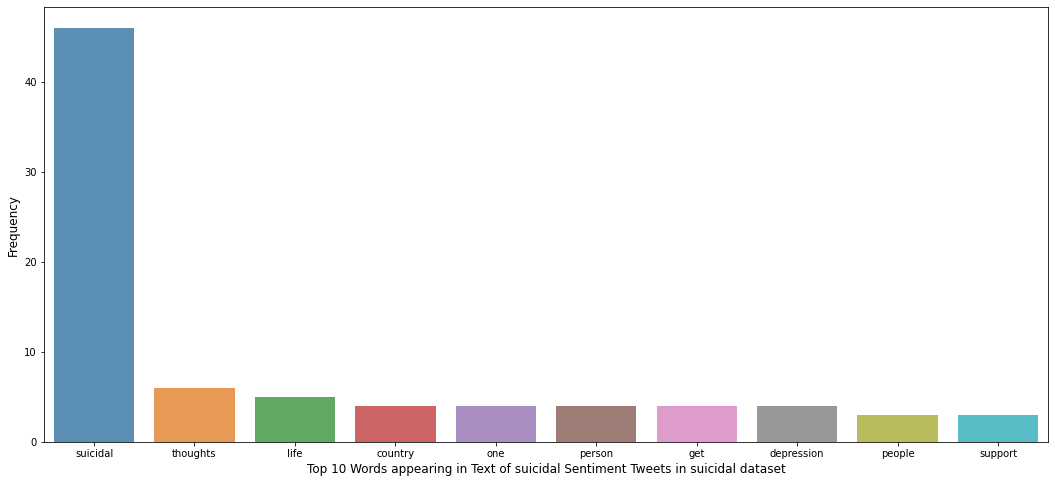

In [ ]:
for f in mylist: 
  df=pd.read_csv('/content/MentalHealth (1).csv')
  data=df.disorder.value_counts()
  Analysis_Data = df
  Analysis_Data["tweet"]= Analysis_Data["tweet"].str.lower()#converting the text into lowercase
  Analysis_Data['tweet'] = Analysis_Data['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (eng_stopwords)]))#removing the english stopwords
  Analysis_Data['tweet'] = Analysis_Data['tweet'].str.replace('[^\w\s]','')#removing the emojis
  for i in range(0,3):
    Sentiment = Analysis_Data[Analysis_Data['disorder'] == data.index[i]]#Creating the dataframe of having same sentiment
    Word_frequency = pd.Series(' '.join(Sentiment.tweet).split()).value_counts()[:10]#Calculating the words frequency
    plt.figure(figsize=(18,8))
    sns.barplot(Word_frequency.index, Word_frequency.values, alpha=0.8)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel('Top 10 Words appearing in Text of '+str(data.index[i])+' Sentiment Tweets in '+str(base[i])+' dataset', fontsize=12)
    plt.show()

On ['Depression', 'anxiety', 'suicidal'] Dataset


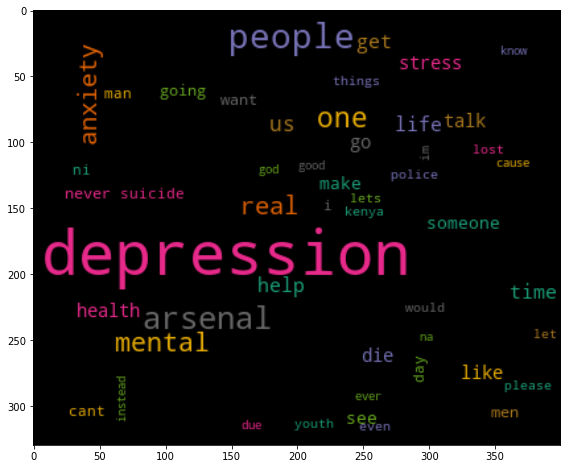

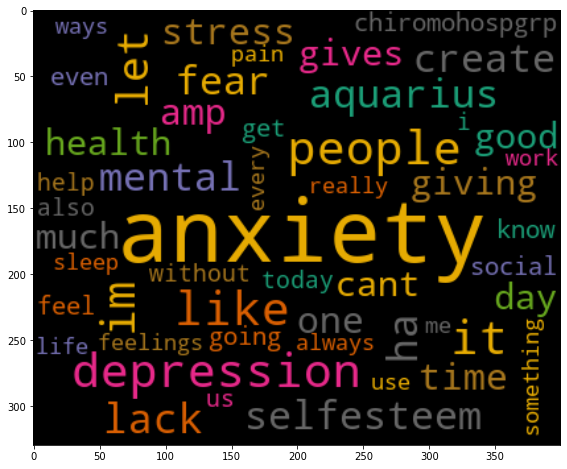

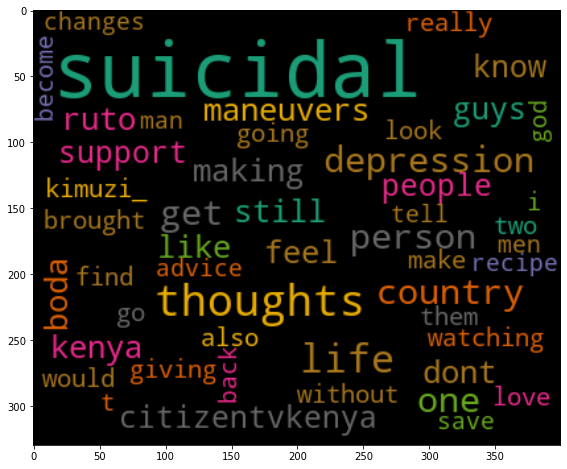

In [ ]:

#looking at the common words present in the tweets for each Sentiment
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.show()
# Plotting word cloud for each Sentiment in each data Sentiment
for f in mylist: 
  df
  data=df.disorder.value_counts()
  print("On "+str(base)+" Dataset")
  for i in range(3):
    Sentiment = Analysis_Data[Analysis_Data['disorder'] == data.index[i]]
    Word_frequency = pd.Series(' '.join(Sentiment.tweet).split()).value_counts()[:50] 
    generate_wordcloud(Word_frequency.sort_values(ascending=False),data.index[i])

In [ ]:
!pip install -q transformers

     |████████████████████████████████| 2.6 MB 5.3 MB/s 
     |████████████████████████████████| 3.3 MB 42.4 MB/s 
     |████████████████████████████████| 636 kB 44.0 MB/s 
     |████████████████████████████████| 895 kB 77.1 MB/s 


In [ ]:
import pandas as pd, numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.model_selection import StratifiedKFold
from transformers import trainer
import tokenizers
import math
print('TF version',tf.__version__)

TF version 2.6.0


In [ ]:
MAX_LEN = 310
PATH = '/content/'
tokenizer = tokenizers.ByteLevelBPETokenizer(
    vocab=PATH+'vocab-roberta-base.json', 
    merges=PATH+'roberta-base-merges.txt', 
    lowercase=True,
    add_prefix_space=True
)
EPOCHS = 3 # originally 3
BATCH_SIZE = 32 # originally 32
PAD_ID = 1
SEED = 100
LABEL_SMOOTHING = 0.1
tf.random.set_seed(SEED)
np.random.seed(SEED)
df1[["clean_tweet","disorder"]]

Exception: ignored

### tokenizing 

In [ ]:
!git clone https://github.com/tensorflow/models.git
import os
os.environ['PYTHONPATH'] += ":/content/models"

import sys
sys.path.append("/content/models")

fatal: destination path 'models' already exists and is not an empty directory.


ModuleNotFoundError: ignored

In [ ]:
# First we have to get the bert tokenizer. and the pretraing nlp.bert package. 
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/2",
                            trainable=True)

INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/2'.
INFO:absl:Downloaded https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/2, Total size: 683.05MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/2'.


In [ ]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

NameError: ignored

In [ ]:
# Adding two extra tokens 
tokenizer.convert_tokens_to_ids(['[CLS]', '[SEP]'])

In [ ]:
# Function to encode or tokenize tweets
def encode_names(n):
   tokens = list(tokenizer.tokenize(n))
   tokens.append('[SEP]')  # seperation token. Would bemuch more useful if you had a multiple text input.
   return tokenizer.convert_tokens_to_ids(tokens)

clean_tweets = tf.ragged.constant([
    encode_names(n) for n in X_train])

In [ ]:
print('Tokenized Tweets shape', clean_tweets.shape.as_list())


In [ ]:
# lets visualize the tokenization
tokenizedTweet = tokenizer.tokenize(X_train[8])
for i in tokenizedTweet:
  print(i, tokenizer.convert_tokens_to_ids([i]))

In [ ]:
# we still need to ass the [CLS] token 
cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*clean_tweets.shape[0]
input_word_ids = tf.concat([cls, clean_tweets], axis=-1)
_ = plt.pcolormesh(input_word_ids[0:10].to_tensor())

### addifng the imput mask and input type. 

In [ ]:
lens = [len(i) for i in input_word_ids]


In [ ]:
max_seq_length = max(lens)
print('Max length  of input is:', max_seq_length)

Max length  of input is: 45


We can make the max sequence length 2 times the maximum length for the model to perform better even in un seen data. 

In [ ]:
max_seq_length = int(2*max_seq_length)
print('Max length is:', max_seq_length)


Max length is: 90


In [ ]:
# For defining input input masks and input type
def encode_names(n, tokenizer): #This is the function for tokenizing as before 
   tokens = list(tokenizer.tokenize(n))
   tokens.append('[SEP]')
   return tokenizer.convert_tokens_to_ids(tokens)


def bert_encode(string_list, tokenizer, max_seq_length):
  num_examples = len(string_list)
  
  string_tokens = tf.ragged.constant([
      encode_names(n, tokenizer) for n in np.array(string_list)])

  cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*string_tokens.shape[0]
  input_word_ids = tf.concat([cls, string_tokens], axis=-1)

  input_mask = tf.ones_like(input_word_ids).to_tensor(shape=(None, max_seq_length))

  type_cls = tf.zeros_like(cls)
  type_tokens = tf.ones_like(string_tokens)
  input_type_ids = tf.concat(
      [type_cls, type_tokens], axis=-1).to_tensor(shape=(None, max_seq_length))

  inputs = {
      'input_word_ids': input_word_ids.to_tensor(shape=(None, max_seq_length)),
      'input_mask': input_mask,
      'input_type_ids': input_type_ids}

  return inputs


In [ ]:
# Calling the function to transform X_train and X_val into bert tokens.
X_train = bert_encode(X_train, tokenizer, max_seq_length)
X_val = bert_encode(X_val, tokenizer, max_seq_length)

### Modelling.


In [ ]:
num_class = 1  # Based on available class selection
max_seq_length = max_seq_length  # we calculated this a couple cells ago

input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="segment_ids")

pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])                                  

output = tf.keras.layers.Dropout(rate=0.1)(pooled_output)

output = tf.keras.layers.Dense(num_class, activation='softmax', name='output')(output)

model = tf.keras.Model(
    inputs={
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': segment_ids
        },
        outputs=output)

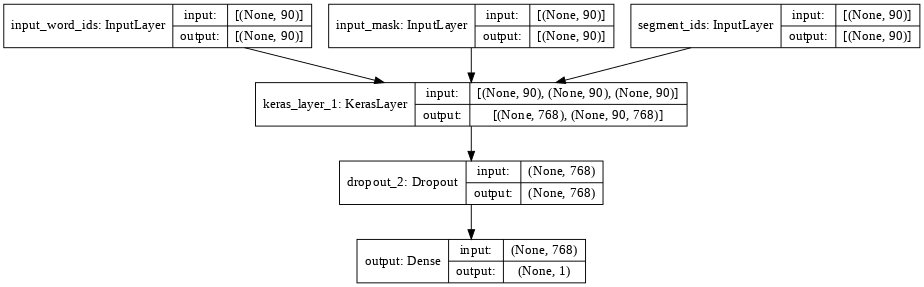

In [ ]:
# VIsual representation of out tf Bert model

tf.keras.utils.plot_model(model, show_shapes=True, dpi=68)

In [ ]:
train_data_size = len(y_train)
train_data_size

454

In [ ]:
# Setting up the training parameters
epochs = 3
batch_size = 16  # select based on your GPU resources
eval_batch_size = batch_size

train_data_size = len(y_train)
steps_per_epoch = int(train_data_size / batch_size)
num_train_steps = steps_per_epoch * epochs
warmup_steps = int(epochs * train_data_size * 0.1 / batch_size)

optimizer = nlp.optimization.create_optimizer(
    2e-5, num_train_steps=num_train_steps, num_warmup_steps=warmup_steps)

In [ ]:
# compile the model
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 90)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 90)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 90)]         0                                            
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      [(None, 768), (None, 177853441   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

In [ ]:
X_val

{'input_mask': <tf.Tensor: shape=(195, 90), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape=(195, 90), dtype=int32, numpy=
 array([[0, 1, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 1, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0]], dtype=int32)>,
 'input_word_ids': <tf.Tensor: shape=(195, 90), dtype=int32, numpy=
 array([[  101, 10379, 13246, ...,     0,     0,     0],
        [  101, 10480, 10107, ...,     0,     0,     0],
        [  101, 33250, 11426, ...,     0,     0,     0],
        ...,
        [  101, 12132, 21885, ...,     0,     0,     0],
        [  101, 42331, 10151, ...,     0,     0,     0],
        [  101, 10539, 53907, ...,     0,     0,

In [ ]:
# Check model performance after wards

history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/3
29/29 [==============================] - 633s 21s/step - loss: -4.0590 - accuracy: 0.0286 - val_loss: -9.7336 - val_accuracy: 0.0103
Epoch 2/3
29/29 [==============================] - 613s 21s/step - loss: -14.5063 - accuracy: 0.0286 - val_loss: -15.5272 - val_accuracy: 0.0103
Epoch 3/3
29/29 [==============================] - 606s 21s/step - loss: -18.8420 - accuracy: 0.0286 - val_loss: -16.9841 - val_accuracy: 0.0103


In [ ]:
# Checking for null values
df.isna().sum()

Unnamed: 0          0
Unnamed: 0.1        0
user                0
tweet               0
location            3
description        28
friends_count       0
followers_count     0
statuses_count      0
created_at          0
retweet_count       0
hashtags            0
disorder            0
dtype: int64

In [ ]:
# Checking the data types of the columns

df.dtypes

tweet         object
created_at    object
disorder      object
dtype: object

In [ ]:
# Changing the created_at column into time and date
df.created_at = pd.to_datetime(df.created_at)
df.dtypes

tweet                 object
created_at    datetime64[ns]
disorder              object
dtype: object

# Data Preprocessing

depression       353
anxiety          278
bipolar           17
schizophrenia     14
autism            14
dementia          12
paranoia           9
Name: disorder, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


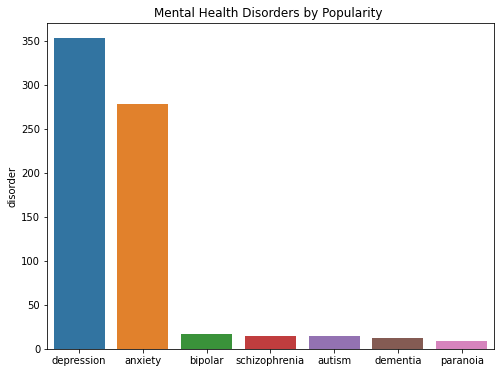

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
x=df['disorder'].value_counts()

print(x)
plt.figure(figsize = (8,6))
plt.title('Mental Health Disorders by Popularity ')
# plt.xlabel( rotate = 45)
sns.barplot(x.index, x);


According to the hashtags the main mental health issues that kenyans are tweeting about are 
- Depression - 
Anxiety 
- Suicidal ideation 
- Bipolar and, 
- Paranoia 

In [ ]:
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['hour'] = df['created_at'].dt.hour
df.head()

,tweet,created_at,disorder,year,month,hour
0,SHOCK as a young man climbs on top of a hospit...,2021-08-17 10:33:55,depression,2021,8,10
1,People tend to hide depression under drinking ...,2021-08-17 10:20:30,depression,2021,8,10
2,@Lily_nganga Depression,2021-08-17 09:32:49,depression,2021,8,9
3,Itumbi has subjected bloggers in to depression...,2021-08-17 08:56:26,depression,2021,8,8
4,Mental health isn’t just anxiety &amp; depress...,2021-08-17 08:18:20,depression,2021,8,8


In [ ]:
# Checking the number of tweets per hour
df.hour.value_counts()


8     66
7     65
17    48
9     47
13    45
11    40
12    38
10    37
19    37
18    35
16    34
14    34
6     28
15    27
5     26
21    21
20    18
4     17
3     10
22     9
23     5
2      4
1      4
0      2
Name: hour, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


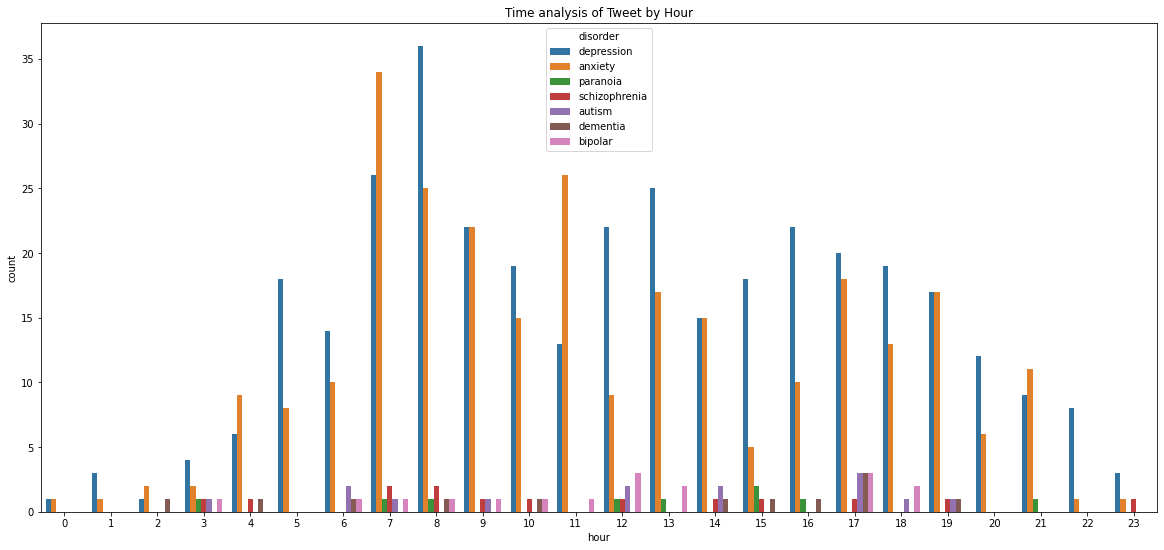

In [ ]:
plt.figure(figsize = (20,9))
plt.title('Time analysis of Tweet by Hour')
x = df.hour

sns.countplot(df.hour.astype('category'), hue = df.disorder )
plt.show()

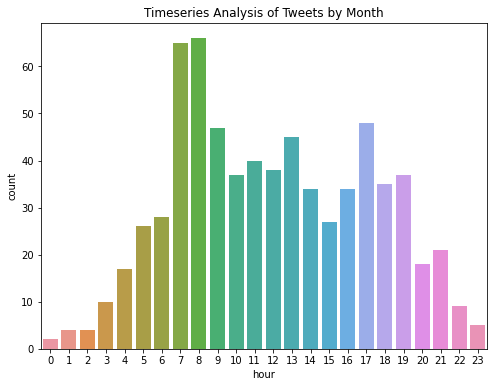

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x = df.hour)
plt.title('Timeseries Analysis of Tweets by Month')
plt.show()


In [ ]:
# We need to remove some unnecessary column that will not help with classification. 
unnecessary = ['created_at', 'year', 'month', 'hour']
df.drop(unnecessary, axis=1, inplace=True)
df.head()

,tweet,disorder
0,SHOCK as a young man climbs on top of a hospit...,depression
1,People tend to hide depression under drinking ...,depression
2,@Lily_nganga Depression,depression
3,Itumbi has subjected bloggers in to depression...,depression
4,Mental health isn’t just anxiety &amp; depress...,depression


In [ ]:
df.disorder.value_counts()

depression       353
anxiety          278
bipolar           17
schizophrenia     14
autism            14
dementia          12
paranoia           9
Name: disorder, dtype: int64

### label encoding

In [ ]:
# We need to labelEncode the data. 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['disorder'] = le.fit_transform(df.disorder)
df.sample (5)

,tweet,disorder
622,Cyber-bullying has driven people to depression...,0
509,"Kiely is a super negative person btw, like the...",0
366,Something that I’ve started doing that has rea...,0
295,Lack of sleep might be equal cardiovascular di...,4
104,"In USA you see names like Bush, Stone yet they...",4


In [ ]:
df.disorder.value_counts()


4    353
0    278
2     17
6     14
1     14
3     12
5      9
Name: disorder, dtype: int64

- anxiety =  0
- schizophrenia = 1 
- bipolar   =   2
- dementia    =   3
- depression = 4
- paranoia    =  5

### word count & unique word count

In [ ]:
# #1. WORD-COUNT
# df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split()))
# print(df[df['disorder']==0]['word_count'].mean()) 
# print(df[df['disorder']==1]['word_count'].mean()) 
# print(df[df['disorder']==2]['word_count'].mean()) 
# print(df[df['disorder']==3]['word_count'].mean()) 
# print(df[df['disorder']==4]['word_count'].mean()) 
# print(df[df['disorder']==5]['word_count'].mean()) 
# print(df[df['disorder']==6]['word_count'].mean()) 
# print('***'*30)
# #tweets on depression are more wordy than the othermental health-categories tweets

# #2. CHARACTER-COUNT
# df['char_count'] = df['tweet'].apply(lambda x: len(str(x)))
# print(df[df['disorder']==0]['char_count'].mean()) #Depression tweets
# print(df[df['disorder']==1]['char_count'].mean())
# print(df[df['disorder']==2]['char_count'].mean())
# print(df[df['disorder']==3]['char_count'].mean())
# print(df[df['disorder']==4]['char_count'].mean())
# print(df[df['disorder']==5]['char_count'].mean())
# print(df[df['disorder']==6]['char_count'].mean())
# print('***'*30) 
# #Depression tweets are longer than the other tweets

# #3. UNIQUE WORD-COUNT
# df['unique_word_count'] = df['tweet'].apply(lambda x: len(set(str(x).split())))
# print(df[df['disorder']==0]['unique_word_count'].mean()) #Depression tweets
# print(df[df['disorder']==1]['unique_word_count'].mean()) #other tweets
# print(df[df['disorder']==2]['unique_word_count'].mean())
# print(df[df['disorder']==3]['unique_word_count'].mean())
# print(df[df['disorder']==4]['unique_word_count'].mean())
# print(df[df['disorder']==5]['unique_word_count'].mean())
# print(df[df['disorder']==6]['unique_word_count'].mean())

### removing unwanted characters. 

In [ ]:
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

In [ ]:
df['clean_tweet'] = df['tweet'].apply(lambda x: preprocess(x))
df.head()

,tweet,disorder,clean_tweet
0,SHOCK as a young man climbs on top of a hospit...,4,shock as a young man climbs on top of a hospit...
1,People tend to hide depression under drinking ...,4,people tend to hide depression under drinking ...
2,@Lily_nganga Depression,4,lily nganga depression
3,Itumbi has subjected bloggers in to depression...,4,itumbi has subjected bloggers in to depression...
4,Mental health isn’t just anxiety &amp; depress...,4,mental health isnt just anxiety amp depression...


ModuleNotFoundError: ignored

In [ ]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)